<div style="text-align: center; font-size: 32px; font-weight: bold;">
    Gradient Descent with Autograd and Backpropagation
</div>

<center><img src='./images/CG_addition.PNG' width=350px></center> 
Example: optimize the model for linear regression

1. Manual
- Prediction: <span style="color: Green;">Manually</span>
- Gradients Computation: <span style="color: Green;">Manually</span>
- Los Computation: <span style="color: Green;">Manually</span>
- Parameter Updates: <span style="color: Green;">Manually</span>

2. Using Autograd
- Prediction: <span style="color: Green;">Manually</span>
- Gradients Computation: <span style="color: Red;">Autograd</span>
- Los Computation: <span style="color: Green;">Manually</span>
- Parameter Updates: <span style="color: Green;">Manually</span>

3. Using pytorch loss and optimizer
- Prediction: <span style="color: Green;">Manually</span>
- Gradients Computation: <span style="color: Red;">Autograd</span>
- Los Computation: <span style="color: Red;">PyTorch Loss</span>
- Parameter Updates: <span style="color: Red;">PyTorch Optimizer</span>

4. Using everything from pytorch
- Prediction: <span style="color: Red;">PyTorch Model</span>
- Gradients Computation: <span style="color: Red;">Autograd</span>
- Los Computation: <span style="color: Red;">PyTorch Loss</span>
- Parameter Updates: <span style="color: Red;">PyTorch Optimizer</span>

## <span style="color: yellow;">Prerequisites: gradient descent and linear regression</span>

## **Linear Regression:**
Linear Regression is a fundamental **supervised learning algorithm** used for **predicting continuous values**. It models the relationship between **independent variables (features)** and a **dependent variable (target/output)** by fitting a straight line.

---

## **1. How Linear Regression Works**
Linear Regression assumes a **linear relationship** between input features $(X)$ and the target variable $(y)$. \
The equation for **Simple Linear Regression** (one feature) is:
$$
y = W X + b
$$

Where:
- $(X)$ = Input feature (independent variable)
- $(y)$ = Output prediction (dependent variable)
- $(W)$ = Weight (slope of the line)
- $(b)$ = Bias (intercept or shift on y-axis)

For **Multiple Linear Regression** (more than one feature):
$$
y = W_1 X_1 + W_2 X_2 + \dots + W_n X_n + b
$$
in matrix notation:

$$
Y = X W + b
$$

Where:
- $(X)$ is the feature matrix (shape: $(m \times n)$, where $(m)$ is the number of samples, and $(n)$ is the number of features).
- $(W)$ is the weight vector.
- $(b)$ is the bias term.

---

### **2. Loss Function: Mean Squared Error (MSE)**
To measure the accuracy of the model, we use the **Mean Squared Error (MSE) loss function**, which calculates the average squared differences between predicted and actual values:

$$
MSE = \frac{1}{m} \sum_{i=1}^{m} (y_i - \hat{y_i})^2
$$

Where:
- $(y_i)$ is the actual value.
- $(\hat{y_i})$ is the predicted value.
- $(m)$ is the number of samples.

Our goal is to minimize this error.

---

### **3. Optimizing Linear Regression: Gradient Descent**
To find the optimal weights $(W)$ and bias $(b)$, we use **Gradient Descent**, an optimization algorithm that updates weights iteratively:

$$
W := W - \alpha \frac{\partial (MSE)}{\partial W}
$$

$$
b := b - \alpha \frac{\partial (MSE)}{\partial b}
$$

Where:
- $\alpha$ (learning rate) controls the step size of updates.
- The partial derivatives or gradeient compute how much to adjust $W$ and $b$.

### Notation and Convention in Machine Learning (ML)
- Many machine learning algorithms (e.g., linear regression, logistic regression, neural networks) rely on **linear algebra**, where matrices are denoted by capital letters ($(X)$) and vectors  are denoted by small letter ($(X)$).
- In ML, the notation for Training Data ($(X)$) and for Labels ($(X)$) is a convention derived from statistics and linear algebra.

#### **1. Training Data/ input features: $(X)$ (Capital Letter)**
- The training data  is typically represented as a **matrix** (2D array), where each row corresponds to a data sample, and each column corresponds to a feature.
- Matrices are usually denoted by **uppercase letters** in mathematical notation, which is why **$(X)$ is used for the feature matrix**.

#### **2. Target / Labels:  $(y)$ (Lowercase Letter)**
- The labels or target values are often represented as a **vector** (1D array), where each element corresponds to the output associated with a row in $(X)$.
- Vectors are conventionally represented using **lowercase letters**, which is why **$(y)$ is used for the target variable**.

#### **Example**
If we have a dataset with $(m)$ training examples and $(n)$ features:

$$
X =
\begin{bmatrix}
x_{1,1} & x_{1,2} & \dots & x_{1,n} \\
x_{2,1} & x_{2,2} & \dots & x_{2,n} \\
\vdots & \vdots & \ddots & \vdots \\
x_{m,1} & x_{m,2} & \dots & x_{m,n}
\end{bmatrix}
$$
where each row represents a sample, and each column represents a feature.

And the target labels:
$$
y =
\begin{bmatrix}
y_1 \\
y_2 \\
\vdots \\
y_m
\end{bmatrix}
$$

where each $(y_i)$ corresponds to the output for the \(i\)-th training example.

### 1.  Manual: Gradient descent usign numpy
- Prediction: <span style="color: Green;">Manually</span>
- Gradients Computation: <span style="color: Green;">Manually</span>
- Los Computation: <span style="color: Green;">Manually</span>
- Parameter Updates: <span style="color: Green;">Manually</span>

```
# Compute every step manually
# Linear regression
# f = w * x
# here : f = 2 * x

f = w*x  : ignoring bias for now.
# let's the weight = 2;  f = 2*x
```

Prediction before training: f(5) = 0.000
epoch 1: w = 1.200, loss = 30.00000000
epoch 3: w = 1.872, loss = 0.76800019
epoch 5: w = 1.980, loss = 0.01966083
epoch 7: w = 1.997, loss = 0.00050332
epoch 9: w = 1.999, loss = 0.00001288
epoch 11: w = 2.000, loss = 0.00000033
epoch 13: w = 2.000, loss = 0.00000001
epoch 15: w = 2.000, loss = 0.00000000
Prediction after training: f(5) = 10.000


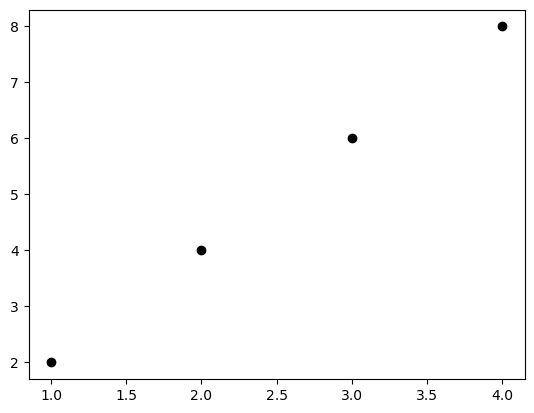

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Lets generate some training samples
X = np.array([1, 2, 3, 4], dtype=np.float32)
# Since our formula is  f = 2*x therefore the valuse are twice of X
Y = np.array([2, 4, 6, 8], dtype=np.float32)

plt.plot(X,Y,'ok')

# Initalise our weigths
w = 0.0

# # model output: Calculate our model predicetion: $f = w*x$
def forward(x):
    return w*x

# Loss = MSE; Calcualte Loss. Loss depend on predecicted and true value. Using MSE loss. 
def loss(y, y_predicted):
    return ((y_predicted-y)**2).mean()

# Calcualte Gradient
# MSE = 1/N*(w*x) - y)**2
# dJ/dw = 1/N 2*x (w*x-y)
def gradient(x, y, y_predicted):
    return np.dot(2*x, y_predicted-y).mean()

print(f'Prediction before training: f(5) = {forward(5):.3f}')

# Trainign
learn_rate = 0.01
n_iters = 15

for epoch in range(n_iters):
    # prediction: Forward Pass
    y_pred = forward(X)

    # Loss 
    l = loss(Y, y_pred)

    # Gradients
    dw = gradient(X, Y, y_pred)

    # Update the weights using gradeint descent. Go in negative direction
    w -= learn_rate*dw

    # if epoch % 1==0:
    if epoch % 2==0: # print every second Step
        print(f'epoch {epoch+1}: w = {w:.3f}, loss = {l:.8f}')

print(f'Prediction after training: f(5) = {forward(5):.3f}')   
    

### 2. Using gradient using PyTorch Autograd
- Prediction: <span style="color: Green;">Manually</span>
- Gradients Computation: <span style="color: Red;">Autograd</span>
- Los Computation: <span style="color: Green;">Manually</span>
- Parameter Updates: <span style="color: Green;">Manually</span>

In [ ]:
import torch

# Lets generate some training samples
X = torch.tensor([1, 2, 3, 4], dtype=torch.float32)
# Since our formula is  f = 2*x therefore the valuse are twice of X
Y = torch.tensor([2, 4, 6, 8], dtype=torch.float32)

# Initalise our weigths. Since we are interested in claculating the gradeint of loss w.r.t. weight. 
# Therefore, we need to specify that it requires gradient calculation`requires_grad=True`
w = torch.tensor(0.0, dtype=torch.float32, requires_grad=True)

# Calculate our model predicetion: $f = w*x$
def forward(x):
    return w*x

# Calcualte Loss. Loss depend on predecicted and true value. Using MSE loss. Loss = MSE
def loss(y, y_predicted):
    return ((y_predicted-y)**2).mean()

# Calcualte Gradient: This step is p[erfromed using PyTorch Autograd

print(f'Prediction before training: f(5) = {forward(5):.3f}')

# Training
learn_rate = 0.01
n_iters = 15

for epoch in range(n_iters):
    # prediction: Forward Pass
    y_pred = forward(X)

    # Loss 
    l = loss(Y, y_pred)

    # Gradients =  backward pass. Rememebr in Computational graph we did backward pass to calcualte the gradeints
    dw = l.backward()  # Gradeint of loss w.r.t. w  dl/dw

    # Update the weights using gradient descent. Be careful
    with torch.no_grad():
        w -= learn_rate*w.grad

    # zero the gradeints to avoid accumulation
    w.grad.zero_()

    # if epoch % 1==0:
    if epoch % 2==0: # print every second Step
        print(f'epoch {epoch+1}: w = {w:.3f}, loss = {l:.8f}')

print(f'Prediction after training: f(5) = {forward(5):.3f}')   

# We will get less accuracy comapred to the numpy implementation numercially. As the gradeint calculation is not as exact as we did in numpy

### 3. Using pytorch loss and optimizer
- Prediction: <span style="color: Green;">Manually</span>
- Gradients Computation: <span style="color: Red;">Autograd</span>
- Los Computation: <span style="color: Red;">PyTorch Loss</span>
- Parameter Updates: <span style="color: Red;">PyTorch Optimizer</span>



In [ ]:
"""
General Training Pipeline in PyTorch. We have three steps.
(1) Design model(input, output size, forward pass)
(2) COnstruct Loss and Optimizer
(3) Training Loop

- Forward Pass: Compute the prediction
- Backward pass: Gradients
- Update weights
- Iterate for number of times

We will use neural network module from pytorch
"""

import torch
import torch.nn as nn

# Lets generate some training samples
X = torch.tensor([1, 2, 3, 4], dtype=torch.float32)
Y = torch.tensor([2, 4, 6, 8], dtype=torch.float32)

w = torch.tensor(0.0, dtype=torch.float32, requires_grad=True)

# Model Prediction
def forward(x):
    return w*x

# print the prediction efore the training, using f string. We want to predict the value 5, whcih shoudl be 10.
print(f'Prediction before training: f(5) = {forward(5):.3f}')

# Training
learn_rate = 0.01
n_iters = 15

loss = nn.MSELoss()
optimizer = torch.optim.SGD([w], lr=learn_rate)

for epoch in range(n_iters):
    # prediction: Forward Pass
    y_pred = forward(X)

    # Loss 
    l = loss(Y, y_pred)

    # Gradients =  backward pass. Rememebr in Computational graph we did backward pass to calcualte the gradeints
    dw = l.backward()  # Gradeint of loss w.r.t. w  dl/dw

    # *** Here we change** Dont need to manually update the weights
    optimizer.step()

    # zero the gradeints to avoid accumulation
    optimizer.zero_grad()

    # if epoch % 1==0:
    if epoch % 2==0: # print every second Step
        print(f'epoch {epoch+1}: w = {w:.3f}, loss = {l:.8f}')

print(f'Prediction after training: f(5) = {forward(5):.3f}')   


### 4. Using everything from pytorch
- Prediction: <span style="color: Red;">PyTorch Model</span>
- Gradients Computation: <span style="color: Red;">Autograd</span>
- Los Computation: <span style="color: Red;">PyTorch Loss</span>
- Parameter Updates: <span style="color: Red;">PyTorch Optimizer</span>

To use `nn.Linear()` the data shape  need to be in specific dimension. It should be 2D arrays where the number of rows - number of samples and for each rows we have features 

In [ ]:
import torch
import torch.nn as nn

# Lets generate some training samples
X = torch.tensor([[1], [2], [3], [4]], dtype=torch.float32)
Y = torch.tensor([[2], [4], [6], [8]]], dtype=torch.float32)

X_test = toch.tensor([5], dtype=torch.float32)
n_samples, n_features = X.shape
print(n_samples, n_features)

# We dont need to define weights, pytorch knows the parematers. Also change the forward fucntioon to pytorch
# usually we have to design this modell. but for this sim;le example, there could be only one layer.
input_size = n_features
output_size = n_features

model = nn.Linear(input_size, output_size)

print(f'Prediction before training: f(5) = {model(X_test).item():.3f}') # Change Here

# Training
learn_rate = 0.01
n_iters = 15

loss = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learn_rate)  # Change Here

for epoch in range(n_iters):
    # prediction: Forward Pass
    y_pred = model(X)

    # Loss 
    l = loss(Y, y_pred)

    # Gradients =  backward pass. Rememebr in Computational graph we did backward pass to calcualte the gradeints
    dw = l.backward()  # Gradeint of loss w.r.t. w  dl/dw

    # *** Here we change** Dont need to manually update the weights
    optimizer.step()

    # zero the gradeints to avoid accumulation
    optimizer.zero_grad()

    # if epoch % 1==0:
    # if epoch % 2==0: # print every second Step
    if epoch % 10==0:
        [w, b] = model.parameters()        
        print('epoch ', epoch+1, ': w = ', w[0][0].item(), ' loss = ', l)

print(f'Prediction before training: f(5) = {model(X_test).item():.3f}')  

# Final oyutput is not that accurate because the initialization is random and also the optimizer may not be that good for this problem.

### Use Custom Model instead `nn.Linear`
Linear regression
f = w * x 

here : f = 2 * x

In [ ]:
import torch
import torch.nn as nn

# 0) Training samples, watch the shape!
X = torch.tensor([[1], [2], [3], [4]], dtype=torch.float32)
Y = torch.tensor([[2], [4], [6], [8]]], dtype=torch.float32)

X_test = toch.tensor([5], dtype=torch.float32)
n_samples, n_features = X.shape
print(n_samples, n_features)

# 1) Design Model, the model has to implement the forward pass!
# Here we can use a built-in model from PyTorch
input_size = n_features
output_size = n_features

# we can call this model with samples X
# model = nn.Linear(input_size, output_size)

class LinearRegression(nn.Module):
    # This will get init method which has self
    def __init__(self, input_dim, output_dim):
        # Call Super class
        super(LinearRegression, self).__init__()
        # Define Layers
        self.lin = nn.Linear(input_dim, output_dim)

    # We have to implement Forward Pass in our model class
    def forward(self, x):
        return self.lin(x)

model = LinearRegression(input_size, output_size)


print(f'Prediction before training: f(5) = {model(X_test).item():.3f}') # Change Here

# 2) Define loss and optimizer
learn_rate = 0.01
n_iters = 100

loss = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learn_rate)  # Change Here

# 3) Training loop
for epoch in range(n_iters):
    # prediction: Forward Pass with our model
    y_pred = model(X)

    # Loss 
    l = loss(Y, y_pred)

    # Gradients =  backward pass. Rememebr in Computational graph we did backward pass to calcualte the gradeints
    dw = l.backward()  # Gradeint of loss w.r.t. w  dl/dw

    # update weights  
    optimizer.step() # Change Here: Dont need to manually update the weights

    # zero the gradeints after updating to avoid accumulation
    optimizer.zero_grad()

    if epoch % 10==0:
        [w, b] = model.parameters()        
        print('epoch ', epoch+1, ': w = ', w[0][0].item(), ' loss = ', l)

print(f'Prediction before training: f(5) = {model(X_test).item():.3f}')  

# Final oyutput is not that accurate because the initialization is random and also the optimizer may not be that good for this problem.

### Final Summary: Linear Regression using PyTorch
0. Prepare Data
1. Design Model (input size, output size, forward pass)
2. Construct Loss and optimizer
3. Training Loop
    - Forward Pass: Compute Prediction and Loss
    - Backward Pass: Gradients
    - Update Weights

Here we implement liinear regression again usign PyTorch

### Generating synthetic Data
Use `make_regression()` to generate dataset suitable for regression tasks, where there is a relationship between input features $(X)$ and a continuous target $(y)$. Here is the code line. Let's understand each arguments
`X_numpy, y_numpy = datasets.make_regression(n_samples=100, n_features=1, noise=20, random_state=1)`

- `n_samples=100`: Number of samples (data points) to generate. Generate 100 rows of data.
- `n_features=1`: Number of features (independent variables). Generate a dataset with one feature per sample.
- `noise=20`: Adds random noise to the output values (y) so the data is not perfectly linear.
- `random_state=1`: Ensures that the dataset generated is reproducible. If you run the same code again, you will get the same results.

In [ ]:
import torch
import torch.nn as nn
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt

# 0 Prepare Data: use `make_regression` from `sklearn.datasets` to generate a synthetic regression dataset.
X_numpy, y_numpy =  datasets.make_regression(n_samples=100, n_features=1, noise=20, random_state=1)
print(X_numpy[:5], y_numpy[:5])

# Convert to PyTorch tensors
# X = torch.tensor(X_numpy, dtype=torch.float32)  # Shape: (100, 1)
# y = torch.tensor(y_numpy, dtype=torch.float32).view(-1, 1)  # Shape: (100, 1) for regression
# For multi-class classification:
# y_classification = torch.randint(0, 3, (100,))  # Example with 3 classes, Shape: (100,)

# compert the data to toch and float32 from double
X = torch.from_numpy(X_numpy.astype(np.float32))
X = torch.from_numpy(y_numpy.astype(np.float32))
y = y.view(y.shape[0], 1)# Reshape the data because currently it has 1 row and we want to make it a column vector. So we want to put each valu in 1 column

n_samples, n_features = X.shape
print(n_samples, n_features)

# 1. Model (input size, output size, forward pass)
# in linear regression case its just a 1 lyaer so we can use builtin model
input_size = n_features
output_size = 1
model = nn.Linear(input_size, output_size)

# 2. Loss and optimizer: Lets call MSELoss function
learning_rate = 0.01
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

# 3. Training Loop
num_epochs = 100
for epoch in range(num_epochs):
    # Forward pass and Loss
    y_predicted = model(X)
    loss = criterion(y_predicted, y) # this need actual labels and prediceted values
    # backward Pass
    loss.backward()
    
    # update
    optimizer.step()

    optimizer.zero_grad()

    if (epoch+1) %10 ==0:
        print(f'epoch: {epoch+1}, loss = {loss.item():.4f}')

# plot
predicted = model(X).detach() # detach this to prevent this to be tracked from cmputaitonal graph. Beacuse the requires_grad was true. After detaching it creates new tensor with requires_grad=false
plt.plot(X_numpy, y_numpy, 'ro')
plt.plot(X_numpy, predicted, 'b')
plt.show()

# Test Exercise for Linear Regression

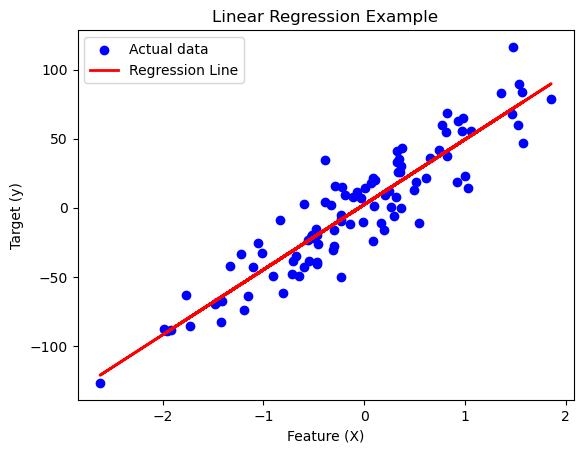

In [12]:
# Example: Linear Regression in Python using **scikit-learn** to predict housing prices:

import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.datasets import make_regression

# Generate synthetic regression data
X, y = make_regression(n_samples=100, n_features=1, noise=20, random_state=42)

# Create a Linear Regression model
model = LinearRegression()

# Train the model
model.fit(X, y)

# Make predictions
y_pred = model.predict(X)

# Plot the results
plt.scatter(X, y, color='blue', label="Actual data")
plt.plot(X, y_pred, color='red', linewidth=2, label="Regression Line")
plt.legend()
plt.xlabel("Feature (X)")
plt.ylabel("Target (y)")
plt.title("Linear Regression Example")
plt.show()

### In Pytorch: Write above code in PyTorch
- Generate Synthetic Data using make_regression() (same as in scikit-learn).
- Convert Data to PyTorch Tensors for model training.
- Define a Linear Regression Model using nn.Linear().
- Specify Loss Function (MSELoss) and Optimizer (SGD).
- Train the Model using Gradient Descent.
- Make Predictions using the trained model.
- Visualize Results with matplotlib.

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression

# Generate synthetic regression data
X_numpy, y_numpy = make_regression(n_samples=100, n_features=1, noise=20, random_state=42)

# Convert to PyTorch tensors
X = torch.tensor(X_numpy, dtype=torch.float32)  # Shape: (100, 1)
y = torch.tensor(y_numpy, dtype=torch.float32).view(-1, 1)  # Shape: (100, 1)

# Define the Linear Regression model
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super(LinearRegressionModel, self).__init__()
        self.linear = nn.Linear(1, 1)  # 1 input feature, 1 output

    def forward(self, x):
        return self.linear(x)

# Initialize model
model = LinearRegressionModel()

# Define loss function (Mean Squared Error) and optimizer (Gradient Descent)
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)  # Learning rate 0.01

# Training loop
epochs = 1000
for epoch in range(epochs):
    optimizer.zero_grad()  # Clear previous gradients
    y_pred = model(X)  # Forward pass
    loss = criterion(y_pred, y)  # Compute loss
    loss.backward()  # Backpropagation
    optimizer.step()  # Update weights

    # Print loss every 100 epochs
    if (epoch+1) % 100 == 0:
        print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}')

# Make predictions
with torch.no_grad():
    y_pred = model(X)

# Plot the results
plt.scatter(X_numpy, y_numpy, color='blue', label="Actual data")
plt.plot(X_numpy, y_pred.numpy(), color='red', linewidth=2, label="Regression Line")
plt.legend()
plt.xlabel("Feature (X)")
plt.ylabel("Target (y)")
plt.title("Linear Regression using PyTorch")
plt.show()


## 🎉 **Thank You!** 🙌  
### 🚀 Happy Coding & Keep Learning! 💡

## <span style="color: yellow;">Next: Logistic Regression</span>

### Logistic Regression
- Logistic Regression works by applying the `sigmoid (logistic) function` to a linear equation. This converts continuous values into probabilities between 0 and 1.
- Logistic Regression is used for classification, not regression.
- It converts linear predictions into probabilities using the `sigmoid function`.
- Binary Logistic Regression is for two-class problems, while Multiclass Logistic Regression `(Softmax)` handles multiple classes.
- The model is trained using `cross-entropy loss` and optimized with techniques like gradient descent.
- It is interpretable, computationally efficient, and widely used in ML applications.